# Table of Contents Cont.
## 01. Importing Libraries
## 02. Importing dataframes
## 03. Merging dataframes
## 05. Customer Profiling (Cont. from previous Nootbook)
## 06. Visualization to show distribution of profiles
## 07. Aggregate varibles on customer profile
## 08. & 09. Compare customer profiles with regions and departments with Visualizations
## 10. Export Dataframe

# 01 Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2 Importing dataframe

In [3]:
#Importing ords_prods_all dataframe
ords_prods_all=pd.read_pickle('../02 Data/Prepared Data/orders_products_all_4.10.1.pkl')

In [4]:
# Change data type

ords_prods_all['customer_activity']=ords_prods_all['customer_activity'].astype('category')
ords_prods_all['age_category']=ords_prods_all['age_category'].astype('category')
ords_prods_all['income_category']=ords_prods_all['income_category'].astype('category')

In [5]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404817
Data columns (total 36 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int32   
 1   gender                 category
 2   state                  category
 3   age                    int8    
 4   date_joined            object  
 5   number_of_dependants   int8    
 6   family_status          category
 7   income                 int32   
 8   order_id               int32   
 9   order_number           int8    
 10  orders_day_of_week     int8    
 11  order_hour_of_day      int8    
 12  days_since_last_order  float16 
 13  first_order            category
 14  product_id             int32   
 15  add_to_cart_order      int8    
 16  reordered              int8    
 17  product_name           category
 18  aisle_id               int8    
 19  department_id          int8    
 20  prices                 float32 
 21  price_range_loc        catego

In [6]:
ords_prods_all.shape

(30964564, 36)

In [7]:
ords_prods_all=ords_prods_all.drop(columns= ['_merge'])

In [8]:
ords_prods_all.shape

(30964564, 35)

In [9]:
ords_prods_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,max_order,loyalty_flag,average_prices,spending_flag,median_days,order_frequency_flag,region,customer_activity,age_category,income_category
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income


# Q5 Cont.

# Department Variable

In [10]:
# Import Department dataframe
dept=pd.read_csv('../02 Data/Prepared Data/departments_wrangled.csv'),index_col = False)

In [11]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
# Rename the "Unnamed: 0" column

dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [13]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
# Change data type

dept['department_id']=dept['department_id'].astype('int8')

In [ ]:
# Merge orders_products_all with Instacart_all

Instacart_all =ords_prods_all.merge(dept,on='department_id', indicator = True)

In [16]:
Instacart_all['_merge'].value_counts()

both          30964564
left_only            0
right_only           0
Name: _merge, dtype: int64

In [17]:
# Check output

Instacart_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,average_prices,spending_flag,median_days,order_frequency_flag,region,customer_activity,age_category,income_category,department,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income,beverages,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income,beverages,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income,beverages,both
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Non-frequent customer,West,High_activity_customer,young_adult,Low-income,beverages,both
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,7.057534,Low spender,26.0,Non-frequent customer,West,High_activity_customer,young_adult,Low-income,beverages,both


In [18]:
# Exporting Instacart_all dataframe
Instacart_all.to_pickle('../02 Data/Prepared Data/Instacart_all.1.pkl')

In [3]:
#Importing Instacart_all dataframe
Instacart_all=pd.read_pickle('../02 Data/Prepared Data/Instacart_all.1.pkl')

In [ ]:
Instacart_all['age_category'].value_counts()

Text(0.5, 1.0, 'Number of Orders by Department')

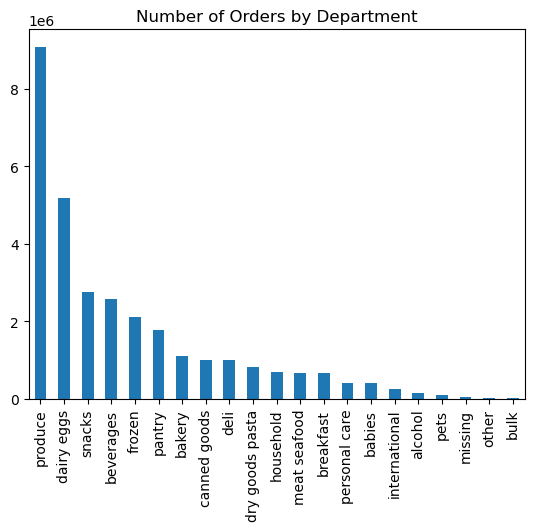

In [19]:
# Create a bar chart

department_bar_chart = Instacart_all['department'].value_counts().plot.bar()
plt.title('Number of Orders by Department')

In [ ]:
# Exporting orders per departments bar chart

department_bar_chart.figure.savefig(('../04 Analysis/Visualizations/department_bar_chart.png'),bbox_inches='tight')

In [4]:
# Create a flag to profile vageterian vs non-vageterian
Instacart_all.loc[Instacart_all['department_id'] == 12, 'customer_type'] = 'non_vageterian'

In [5]:
Instacart_all.loc[Instacart_all['department_id'] != 12, 'customer_type'] = 'vageterian'

In [6]:
# Use user_id to identify non-vageterian

non_vageterian_column = Instacart_all.loc[Instacart_all['customer_type'] == 'non_vageterian', 'user_id'].unique()

In [7]:
# Update the "customer_type" column

Instacart_all.loc[Instacart_all['user_id'].isin(non_vageterian_column), 'customer_type'] = 'non_vageterian'

In [8]:
# Check output

Instacart_all['customer_type'].value_counts()

non_vageterian    23065332
vageterian         7899232
Name: customer_type, dtype: int64

# Number of Dependant Varible

In [11]:
Instacart_all['age_category'].value_counts()

young_adult          10665110
old_adult            10574504
middle_aged_adult     9724950
Name: age_category, dtype: int64

In [12]:
# Creating a Parental_profile flage by age group

Instacart_all.loc[(Instacart_all['age_category']=='young_adult') & (Instacart_all['number_of_dependants']==0), 'Parental_profile'] = 'Young Adult'

In [13]:
Instacart_all.loc[(Instacart_all['age_category']=='young_adult') & (Instacart_all['number_of_dependants']>=1), 'Parental_profile'] = 'Young parent'

In [14]:
Instacart_all.loc[(Instacart_all['age_category']=='middle_aged_adult') & (Instacart_all['number_of_dependants']==0), 'Parental_profile'] = 'Middle aged adult'

In [15]:
Instacart_all.loc[(Instacart_all['age_category']=='middle_aged_adult') & (Instacart_all['number_of_dependants']>=1), 'Parental_profile'] = 'Middle aged parent'

In [16]:
Instacart_all.loc[(Instacart_all['age_category']=='old_adult') & (Instacart_all['number_of_dependants']==0), 'Parental_profile'] = 'Old adult'

In [17]:
Instacart_all.loc[(Instacart_all['age_category']=='old_adult') & (Instacart_all['number_of_dependants']>=1), 'Parental_profile'] = 'Old Parent'

In [18]:
# Check outcome
Instacart_all['Parental_profile'].value_counts()

Young parent          8004535
Old Parent            7929233
Middle aged parent    7291115
Young Adult           2660575
Old adult             2645271
Middle aged adult     2433835
Name: Parental_profile, dtype: int64

In [19]:
# Check Parental_profile column with orders_day_of_week
Parental_profile_order_days_week = pd.crosstab(Instacart_all['orders_day_of_week'],Instacart_all['Parental_profile'],dropna=False)

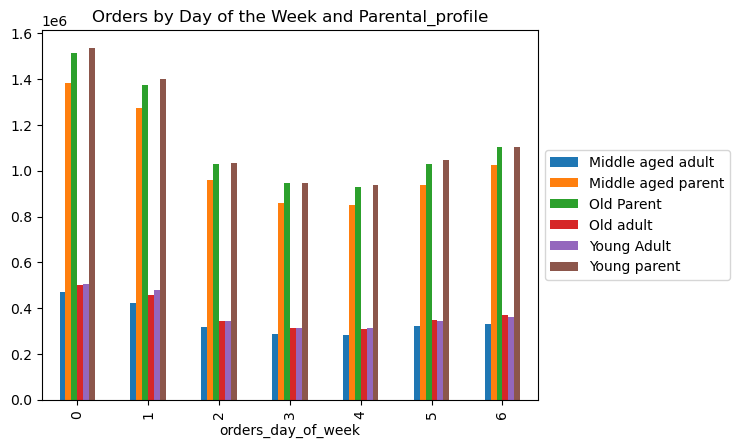

In [20]:
# Create Parental_profile column compared by orders_day_of_week bar chart
Parental_profile_order_days_week_bar = Parental_profile_order_days_week.plot.bar()
plt.title('Orders by Day of the Week and Parental_profile')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [21]:
# Exporting Orders by Day of the Week and family Status bar chart
Parental_profile_order_days_week_bar.figure.savefig(('../04 Analysis/Visualizations/Parental_profile_order_days_week_bar.png'),bbox_inches='tight')

In [22]:
# Check family status flag column with order_hour_of_day
Parental_profile_order_hour_day = pd.crosstab(Instacart_all['order_hour_of_day'],Instacart_all['Parental_profile'],dropna=False)

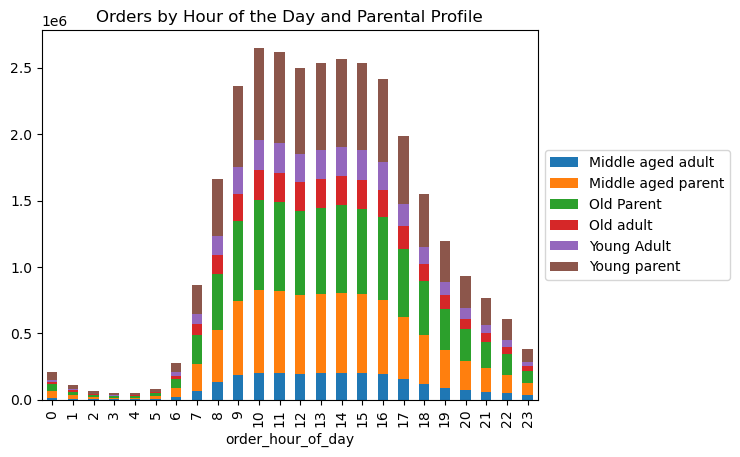

In [23]:
# Create family status flag column compared by order_hour_of_day bar chart
Parental_profile_order_hour_day_bar = Parental_profile_order_hour_day.plot.bar(stacked = True)
plt.title('Orders by Hour of the Day and Parental Profile')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [24]:
# Exporting Orders by Hour of the Day and family Status bar chart
Parental_profile_order_hour_day_bar.figure.savefig(('../04 Analysis/Visualizations/Parental_profile_order_hour_day_bar.png'),bbox_inches='tight')

# Q6 Create Visualization for to show distribution of profiles

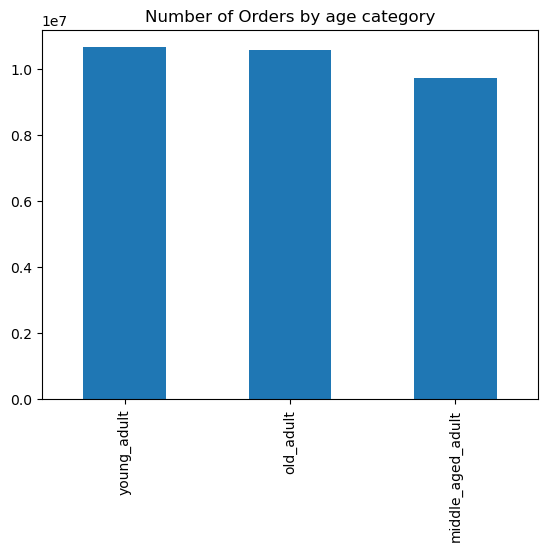

In [38]:
# Create a bar chart for Age Category

age_category_bar = Instacart_all['age_category'].value_counts().plot.bar()
plt.title('Number of Orders by age category')
plt.show()

In [39]:
# Exporting number of orders by age category bar chart
age_category_bar.figure.savefig(('../04 Analysis/Visualizations/age_category_bar.png'),bbox_inches='tight')

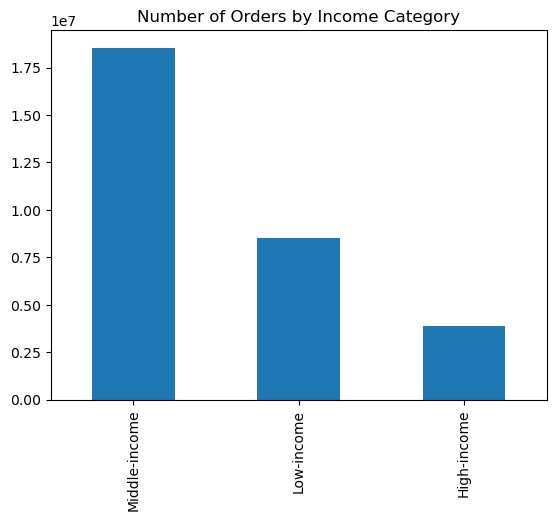

In [40]:
# Create income bar chart
income_category_bar_chart = Instacart_all['income_category'].value_counts().plot.bar()
plt.title('Number of Orders by Income Category')
plt.show()

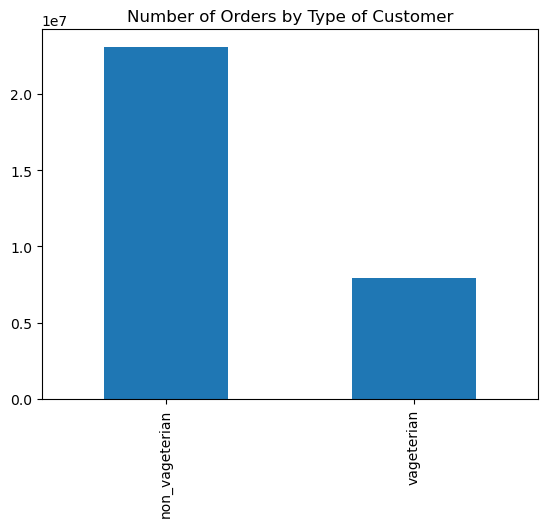

In [41]:
# Create customer_type bar chart

customer_type_bar_chart = Instacart_all['customer_type'].value_counts().plot.bar()
plt.title('Number of Orders by Type of Customer')
plt.show()

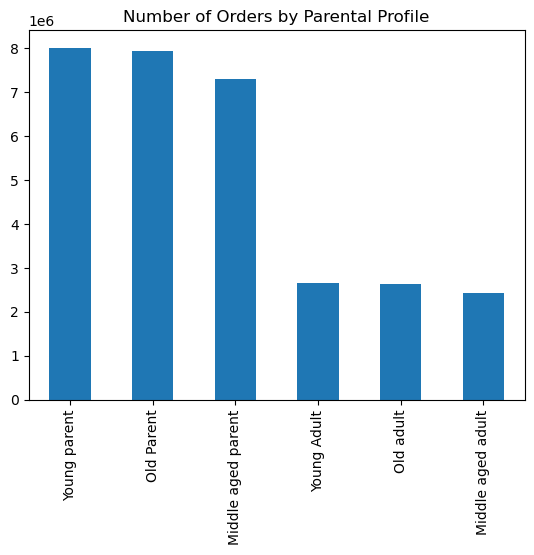

In [25]:
# Create family status flag bar chart
Parental_profile_bar_chart = Instacart_all['Parental_profile'].value_counts().plot.bar()
plt.title('Number of Orders by Parental Profile')
plt.show()

In [26]:
# Exporting Number of Orders by Parental Profile bar chart
Parental_profile_bar_chart.figure.savefig(('../04 Analysis/Visualizations/Parental_profile_bar_chart.png'),bbox_inches='tight')

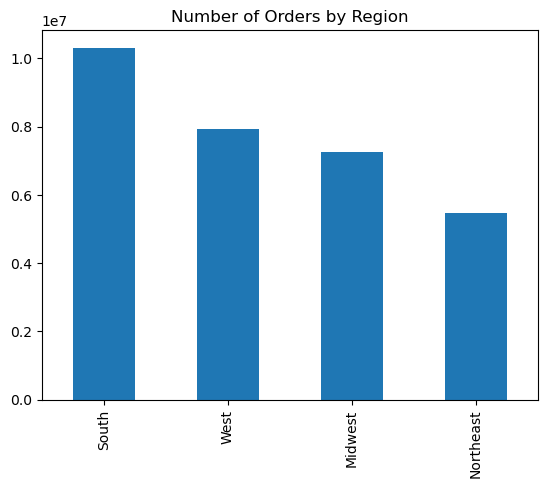

In [43]:
# Create region bar chart

region_bar_chart = Instacart_all['region'].value_counts().plot.bar()
plt.title('Number of Orders by Region')
plt.show()

In [44]:
# Exporting bar charts
income_category_bar_chart.figure.savefig(('../04 Analysis/Visualizations/income_category_bar_chart.png'),bbox_inches='tight')
customer_type_bar_chart.figure.savefig(('../04 Analysis/Visualizations/customer_type_bar_chart.png'),bbox_inches='tight')
region_bar_chart.figure.savefig(('../04 Analysis/Visualizations/region_bar_chart.png'),bbox_inches='tight')

# Q7.  Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [45]:
# Aggregate Age Category
crosstab_age_category = Instacart_all.groupby('age_category').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [46]:
crosstab_age_category

order_id days_since_last_order                  prices  \
                      count                   min       mean   max    min   
age_category                                                                
middle_aged_adult   9724950                   0.0  10.819702  30.0    1.0   
old_adult          10574504                   0.0  10.800664  30.0    1.0   
young_adult        10665110                   0.0  10.811278  30.0    1.0   

                                   
                       mean   max  
age_category                       
middle_aged_adult  7.791641  25.0  
old_adult          7.795446  25.0  
young_adult        7.784818  25.0

In [47]:
crosstab_age_category.to_clipboard()

In [48]:
# Aggregate Income Category
crosstab_income_category = Instacart_all.groupby('income_category').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [49]:
crosstab_income_category

order_id days_since_last_order                  prices  \
                    count                   min       mean   max    min   
income_category                                                           
High-income       3894534                   0.0  10.684293  30.0    1.0   
Low-income        8520533                   0.0  10.935595  30.0    1.0   
Middle-income    18549497                   0.0  10.779326  30.0    1.0   

                                 
                     mean   max  
income_category                  
High-income      7.940855  25.0  
Low-income       7.358224  25.0  
Middle-income    7.957685  25.0

In [50]:
crosstab_income_category.to_clipboard()

In [51]:
# Aggregate customer type
crosstab_customer_type = Instacart_all.groupby('customer_type').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [52]:
crosstab_customer_type

order_id days_since_last_order                 prices  \
                   count                   min      mean   max    min   
customer_type                                                           
non_vageterian  23065332                   0.0  10.56197  30.0    1.0   
vageterian       7899232                   0.0  11.54690  30.0    1.0   

                                
                    mean   max  
customer_type                   
non_vageterian  7.901311  25.0  
vageterian      7.467293  20.0

In [53]:
crosstab_customer_type.to_clipboard()

In [54]:
# Aggregate family status flag
crosstab_family_stuts_flag = Instacart_all.groupby('family_status_flag').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [55]:
crosstab_family_stuts_flag

order_id days_since_last_order                   \
                              count                   min       mean   max   
family_status_flag                                                           
Married WITH Dependants    21743711                   0.0  10.820875  30.0   
Single WITH Dependants      1481172                   0.0  10.750995  30.0   
Single with no dependants   7739681                   0.0  10.791950  30.0   

                          prices                  
                             min      mean   max  
family_status_flag                                
Married WITH Dependants      1.0  7.790278  25.0  
Single WITH Dependants       1.0  7.800604  25.0  
Single with no dependants    1.0  7.789550  25.0

In [56]:
crosstab_family_stuts_flag.to_clipboard()

In [57]:
# Aggregate region
crosstab_region = Instacart_all.groupby('region').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [58]:
crosstab_region

order_id days_since_last_order                  prices            \
              count                   min       mean   max    min      mean   
region                                                                        
Midwest     7261513                   0.0  10.892735  30.0    1.0  7.792318   
Northeast   5464685                   0.0  10.774220  30.0    1.0  7.781441   
South      10311139                   0.0  10.814227  30.0    1.0  7.794439   
West        7927227                   0.0  10.754622  30.0    1.0  7.790308   

                 
            max  
region           
Midwest    25.0  
Northeast  25.0  
South      25.0  
West       25.0

In [59]:
crosstab_region.to_clipboard()

# Q8. Compare custormer profiles with regios and departments

In [60]:
# Check customer profile loyalty with Region

region_loyalty = pd.crosstab(Instacart_all['loyalty_flag'],Instacart_all['region'],dropna=False)

In [61]:
region_loyalty = region_loyalty.sort_values(by=['South'], ascending=True)

In [62]:
# Check customer profile with Region and department
region_departments = pd.crosstab(Instacart_all['department'],Instacart_all['region'],dropna=False)

In [63]:
region_departments=region_departments.sort_values(by=['South'], ascending=True)

In [64]:
# Check customer profile with Region/vageterian

region_customer_type = pd.crosstab(Instacart_all['region'],Instacart_all['customer_type'],dropna=False)

# Q9. Create suitable charts for Q8

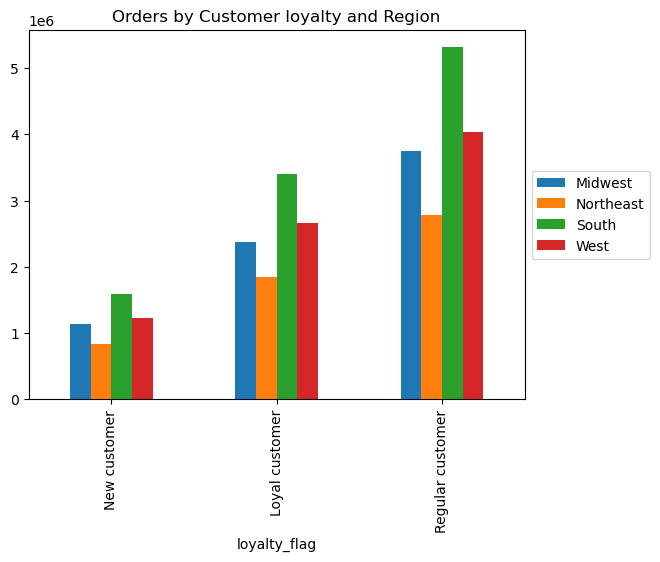

In [65]:
# Create loyal customer by region bar chart
region_loyalty_bar = region_loyalty.plot.bar()
plt.title('Orders by Customer loyalty and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

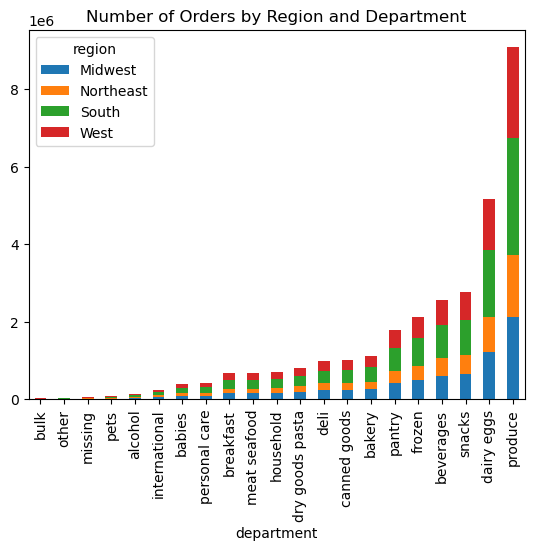

In [66]:
# Create department orders by region bar chart
region_departments_bar = region_departments.plot.bar(stacked = True)
plt.title('Number of Orders by Region and Department')
plt.show()

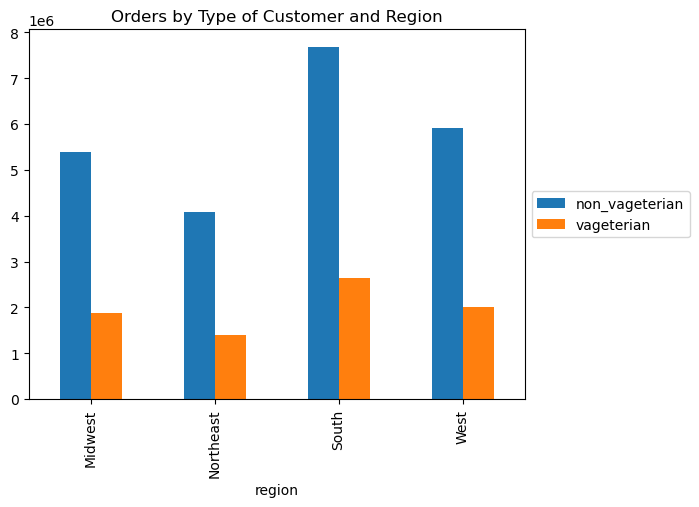

In [67]:
# Create customer type by region bar chart
region_customer_type_bar = region_customer_type.plot.bar()
plt.title('Orders by Type of Customer and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [68]:
# Exporting bar charts
region_loyalty_bar.figure.savefig(('../04 Analysis/Visualizations/region_loyalty_bar.png'),bbox_inches='tight')
region_departments_bar.figure.savefig(('../04 Analysis/Visualizations/region_departments_bar.png'),bbox_inches='tight')
region_customer_type_bar.figure.savefig(('../04 Analysis/Visualizations/region_customer_type_bar.png'),bbox_inches='tight')

In [29]:
# Exporting Instacart_all dataframe
Instacart_all.to_pickle('../02 Data/Prepared Data/orders_products_all.pkl')

In [27]:
Instacart_all.shape

(30964564, 39)

In [28]:
Instacart_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,median_days,order_frequency_flag,region,customer_activity,age_category,income_category,department,_merge,customer_type,Parental_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income,beverages,both,vageterian,Middle aged parent
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income,beverages,both,vageterian,Middle aged parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,19.0,Regular customer,Midwest,High_activity_customer,middle_aged_adult,High-income,beverages,both,vageterian,Middle aged parent
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,26.0,Non-frequent customer,West,High_activity_customer,young_adult,Low-income,beverages,both,non_vageterian,Young Adult
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,26.0,Non-frequent customer,West,High_activity_customer,young_adult,Low-income,beverages,both,non_vageterian,Young Adult
